In [2]:
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(os.path.abspath(os.path.join('..')))

from src.loader import DataLoader
from src.analysis import NewsAnalyzer, StockAnalyzer

# Path to the data folder
DATA_PATH = '../data/raw'
loader = DataLoader(DATA_PATH)


# --- PART 1: NEWS ANALYSIS ---
## Load data using our Class

In [4]:
news_df = loader.load_news_data('raw_analyst_ratings.csv')

Loading news data from ../data/raw\raw_analyst_ratings.csv...


# Initialize Analyzer

In [5]:
news_analyzer = NewsAnalyzer(news_df)

# 1. Headline Statistics

In [6]:
print("Headline Statistics:")
print(news_analyzer.get_headline_stats())

Headline Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_len, dtype: float64


# 2. Plot: Top Publishers

C:\Users\isaac\AppData\Local\Temp\ipykernel_11408\2457542085.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='viridis')


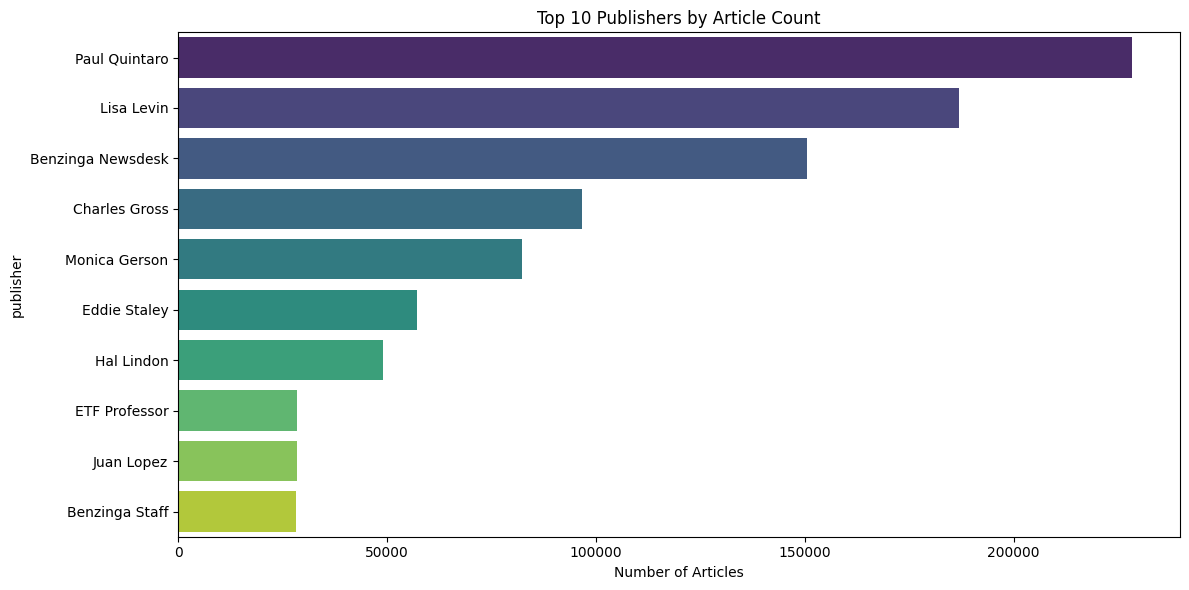

In [7]:
top_publishers = news_analyzer.get_top_publishers(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='viridis')
plt.title('Top 10 Publishers by Article Count')
plt.xlabel('Number of Articles')
plt.tight_layout()
plt.savefig('../top_publishers.png') # Saving for your report
plt.show()



# 3. Plot: Publication Trends (Daily)

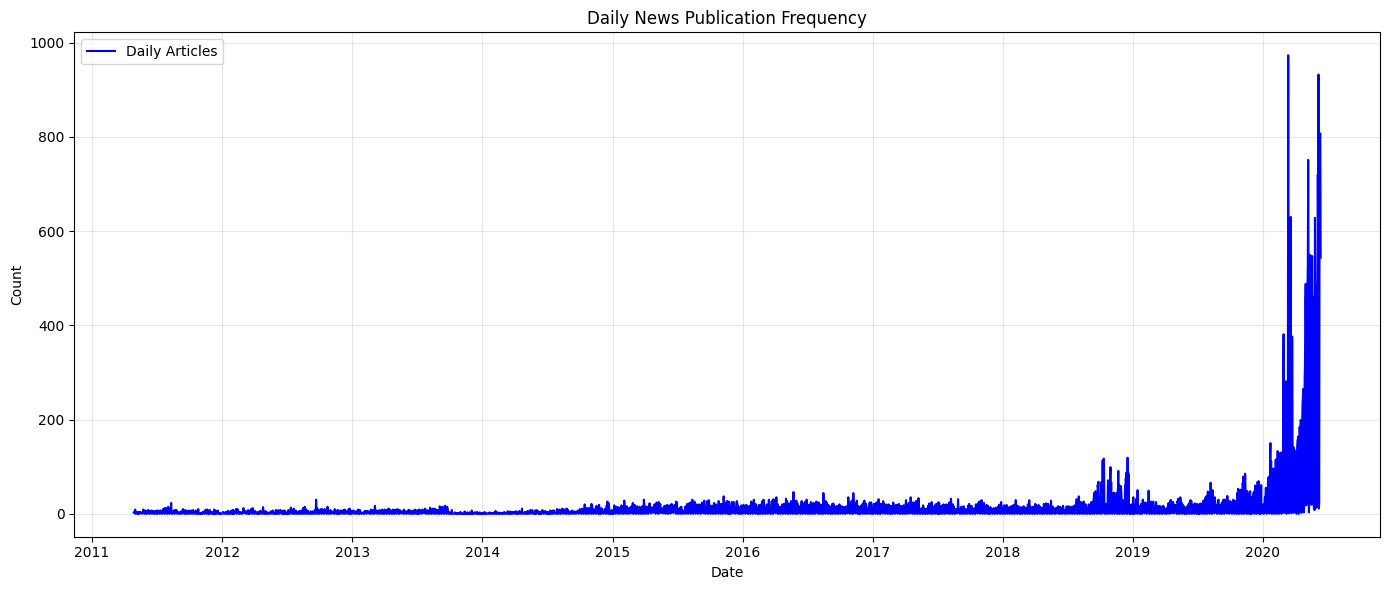

In [8]:
daily_counts = news_analyzer.get_daily_publication_counts()
plt.figure(figsize=(14, 6))
plt.plot(daily_counts.index, daily_counts.values, label='Daily Articles', color='blue')
plt.title('Daily News Publication Frequency')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../publication_trend.png')
plt.show()

# --- PART 2: STOCK ANALYSIS (Task 2 Start) ---
## Load Apple Stock Data

In [9]:
aapl_df = loader.load_stock_data('AAPL')

Loading stock data for AAPL...


## Initialize Stock Analyzer

In [10]:
stock_analyzer = StockAnalyzer(aapl_df)
# Calculate Indicators using our Class
aapl_df = stock_analyzer.add_moving_average(window=20)
aapl_df = stock_analyzer.add_rsi(window=14)

# 4. Plot: Stock Price + SMA

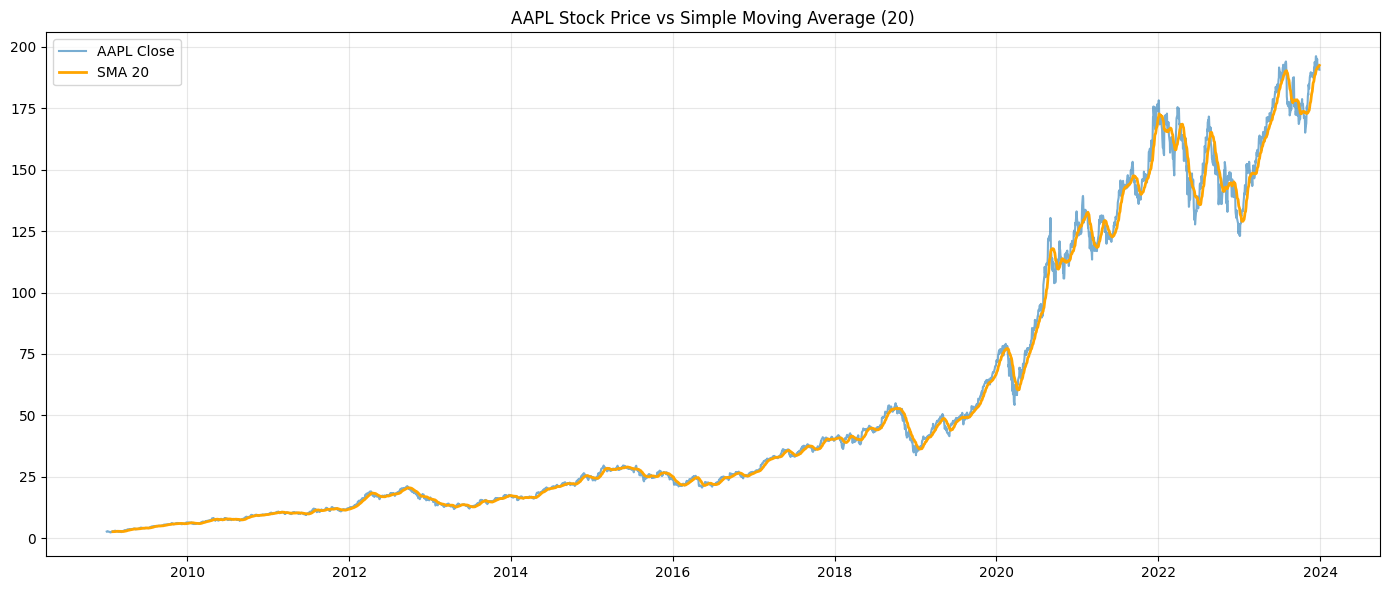

In [11]:
plt.figure(figsize=(14, 6))
plt.plot(aapl_df.index, aapl_df['Close'], label='AAPL Close', alpha=0.6)
plt.plot(aapl_df.index, aapl_df['SMA_20'], label='SMA 20', color='orange', linewidth=2)
plt.title('AAPL Stock Price vs Simple Moving Average (20)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../aapl_sma.png')
plt.show()

# 5. Plot: RSI

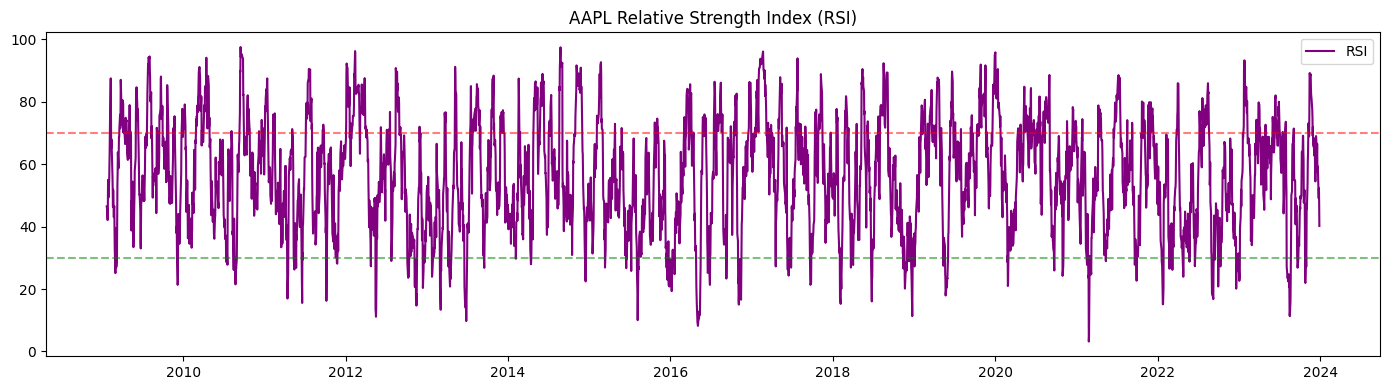

Analysis Complete. Images saved to project root folder.


In [12]:
plt.figure(figsize=(14, 4))
plt.plot(aapl_df.index, aapl_df['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', alpha=0.5)
plt.axhline(30, color='green', linestyle='--', alpha=0.5)
plt.title('AAPL Relative Strength Index (RSI)')
plt.legend()
plt.tight_layout()
plt.savefig('../aapl_rsi.png')
plt.show()

print("Analysis Complete. Images saved to project root folder.")